The KNearestNeighbors (KNN) classifier consists of two stages:

    -In the training stage, the classifier takes the training data and simply memorizes it
    -In the test stage, the classifier compares the test data with 
     the training data and simply returns the maximum occuring label of the k nearest data points.
     I'll use Euclidean Distance to measure distance so will have to normalize all features before hand 
     
     I'll be using a dataset that I came across in school as an example of how the algorithm works. 
     The Diabetic Retinopathy data set contains features from the Messidor image set to predict whether an image          contains signs of diabetic retinopathy or not. So the label is binary. But this algorithm should work for a more      categoricaly labeled dataset. 

Get data and normalize featues  
Create dataPoint class 

In [18]:

import matplotlib.pyplot as plt
from math import log
class DataPoint:
    def __str__(self):
        return "< " + str(self.label) + ": " + str(self.features) + " >"
    def __init__(self, label, features):
        self.label = label # the classification label of this data point
        self.features = features

Creating datapoints 

In [19]:
def get_data(filename):
    data = []
    with open(filename) as file:
        for record in file:
            features = [float(i) for i in record.split(',')]
            label = features[-1]
            dataPoint = DataPoint(label, features)
            data.append(dataPoint)
    return data

# Normalize dataset

In [20]:
def findMaxMin(data, numFeat):
    maxFeats = []
    minFeats = []
    for index in range(numFeat):
        currMax, currMin = float("-inf"), float("inf")
        for dataPoint in data:
            feat = dataPoint.features[index]
            if currMax <= feat:
                currMax = feat
            if currMin >= feat:
                currMin = feat
        maxFeats.append(currMax)
        minFeats.append(currMin)
    return maxFeats, minFeats
def normalize(data):
    numFeats = len(data[0].features) - 1
    maxFeats, minFeats = findMaxMin(data, numFeats)
    for dataPoint in data:
        for index in range(numFeats):
            feat = dataPoint.features[index]
            dataPoint.features[index] = (feat - minFeats[index]) / (maxFeats[index] - minFeats[index])
    return data

# Build K Nearest Neighbors Classifier 

In [21]:
#This will return a guess for a new datapoint 
def buildKNN(data, k, testPoint):
    minDist = float("inf")
    numFeats = len(data[0].features) - 1
    #dictionary key is neighbor of testPoint 
    # val = euclid dist between two points
    kClosestNeighbors = {}
    for dataPoint in data:
        dist = 0
        for featIndex in range(numFeats):
            #Euclidean distance 
            dist += (dataPoint.features[featIndex] - testPoint.features[featIndex])**2
        dist = dist ** .5
        kClosestNeighbors[dataPoint] = dist
        if len(kClosestNeighbors) > k:
            #delete element with highest distance 
            maxDist = float("-inf")
            maxKey = None
            for dataPoint, dist in kClosestNeighbors.items():
                if dist >= maxDist:
                    maxDist = dist
                    maxKey = dataPoint
            kClosestNeighbors.pop(maxKey)
    #Now we have a dictionary of k closest neighbors 
    #select label of ad that is most prevelent in this dictionary 
    #right now I'm just implementing it with a yes or no label (0, 1)
    #but I can change it later 
    num0, num1 = 0, 0
    for dataPoint in kClosestNeighbors:
        if dataPoint.label == 0:
                num0 += 1
        else:
            num1 += 1
    if num0 > num1:
        return 0
    return 1
        

# Find the best value of k using 5-fold cross validation
In each fold of CV, divide data into a training set and a validation set.
Try k ranging from 1 to 10 and plot the accuracies using 5-fold CV
Use this plot to identify the best value of k

In [22]:
def getAccuracy(trainData, testData, k):
    numCorrect, totalNum = 0, 0
    for testPoint in testData:
        guess = buildKNN(trainData, k, testPoint)
        if guess == testPoint.label:
            numCorrect += 1
        totalNum += 1
    return numCorrect / totalNum

In [23]:
def findK(data):
    numFolds = 5
    accuracies = [0 for x in range(11)]
    sizeFold = len(d) // numFolds
    for k in range(1, 11, 2):
        runningSum = 0
        for x in range(1, numFolds + 1):
            test_set = d[(sizeFold * (x - 1)):((sizeFold * x) + 1)]
            train_set_one = d[:(sizeFold * (x - 1) + 1)]
            train_set_two = d[(sizeFold * x) + 1:]
            train_set = train_set_one + train_set_two
            acc = getAccuracy(train_set, test_set, k)
            runningSum += acc
        accuracy = runningSum / numFolds
        accuracies[k] = accuracy
    #plotAcc = [float('nan') if x==0 else x for x in accuracies]
    accPlot = []
    for x in range(1, 11, 2):
        accPlot.append(accuracies[x])
    xPlot = [1, 3, 5, 7, 9]
    plt.plot(xPlot, accPlot)
    plt.show()
    return accuracies.index(max(accuracies))

Now I'm gonna measure the accuracy of the classifier using 5-fold cross validation. In each fold of this CV, I divide the data into a training set and a test set. The training set should get sent through findK, resulting in a value of k to use. Using that k, I calculate an accuracy on the test set. Then I average the accuracy over all 5 folds to obtain the final accuracy measurement.
All I need to do to finish this is to figure out how to incorporate this into the app. 
Obviously the labels will be the different adds the user wants. 
The difficult part will be figuring out how to incorporate data from the app into this. 

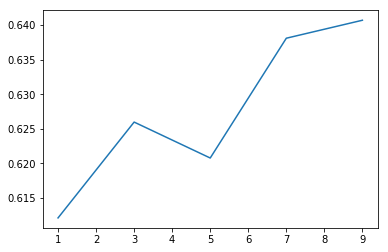

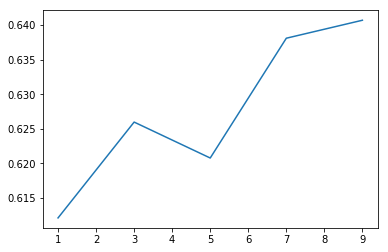

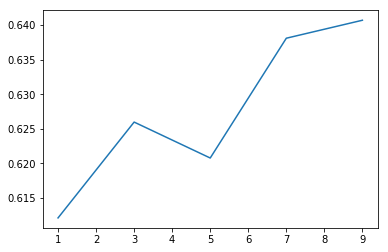

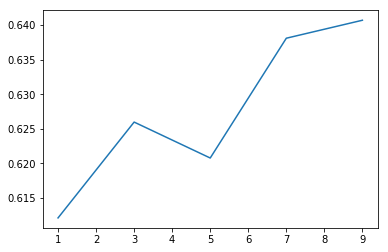

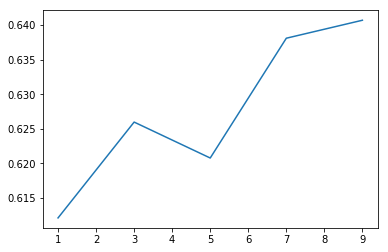

The accuracy on the test set is  64.06926406926407


In [24]:
d = get_data("messidor_features.txt")
d = normalize(d)
runningSum = 0
numFolds = 5
sizeFold = len(d) // numFolds
for x in range(1, numFolds + 1):
    test_set = d[(sizeFold * (x - 1)):((sizeFold * x) + 1)]
    train_set_one = d[:(sizeFold * (x - 1) + 1)]
    train_set_two = d[(sizeFold * x) + 1:]
    train_set = train_set_one + train_set_two
    k = findK(train_set)
    acc = getAccuracy(train_set, test_set, k)
    runningSum += acc
accuracy = runningSum / numFolds
print ('The accuracy on the test set is ', str(accuracy * 100.0))